# Brain Tumour Detection
J031- Sanika Mhadgut  
J046- Gayathri Shrikanth

Reading the Dataset

In [0]:
# Colab library to upload files to notebook
from google.colab import files
import os
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
import glob
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
# Install Kaggle library
!pip install -q kaggle


!mkdir ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/kaggle.json

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [0]:
!kaggle datasets download -d navoneel/brain-mri-images-for-brain-tumor-detection

401 - Unauthorized


In [0]:
!unzip "/content/brain-mri-images-for-brain-tumor-detection.zip"

Archive:  /content/brain-mri-images-for-brain-tumor-detection.zip
replace brain_tumor_dataset/no/1 no.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

Overview of Images

In [0]:
tumour_images=[]
for name in glob.glob('/content/brain_tumor_dataset/yes/*.jpg'): 
  image = cv2.imread(name)
  image = cv2.resize(image,(240,240))
  tumour_images.append(image)

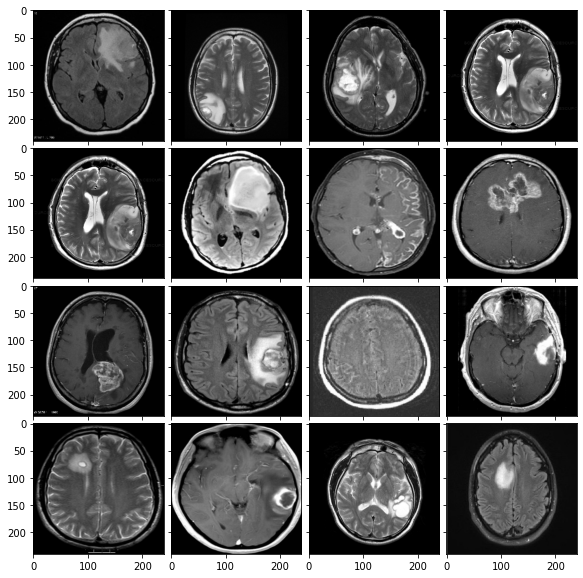

In [0]:
fig = plt.figure(figsize=(10., 10.))
grid = ImageGrid(fig, 111, nrows_ncols=(4, 4),  axes_pad=0.1,   )
for ax, im in zip(grid, tumour_images[0:16]):
    ax.imshow(im)
plt.show()

Tumour detection

width: 700 pixels
height: 890 pixels
channels: 3


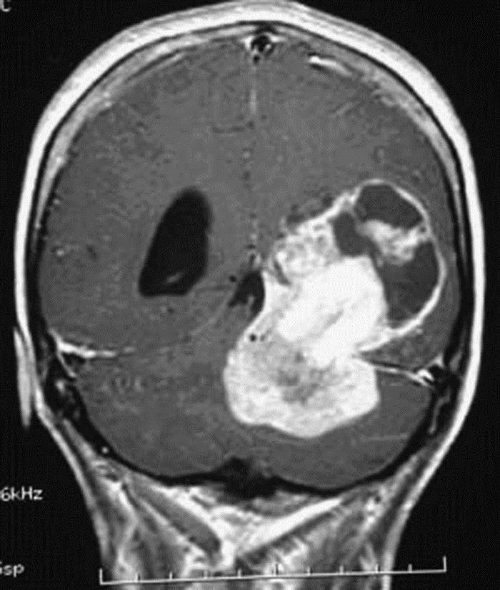

In [0]:
img_path = "/content/yes/Y104.jpg"
image = cv2.imread(img_path)
print("width: {} pixels".format(image.shape[1]))
print("height: {} pixels".format(image.shape[0]))
print("channels: {}".format(image.shape[2]))
dim=(500,590)
image=cv2.resize(image, dim)
cv2_imshow( image)

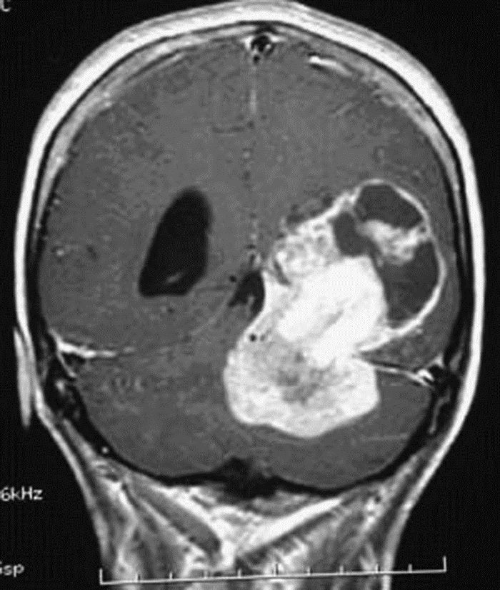

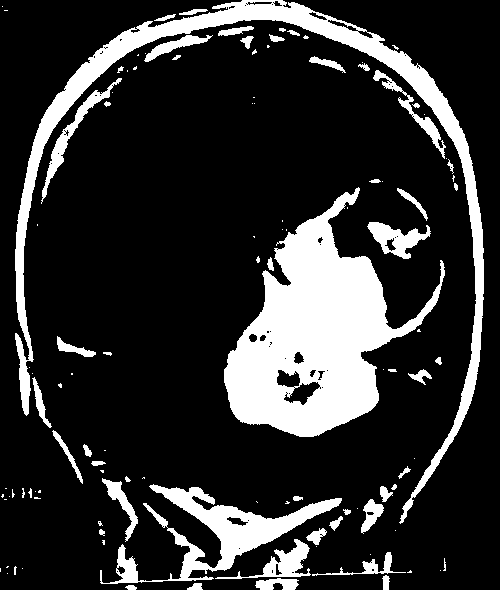

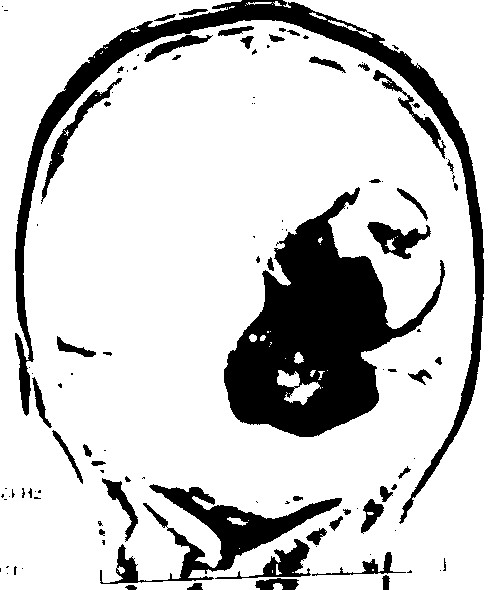

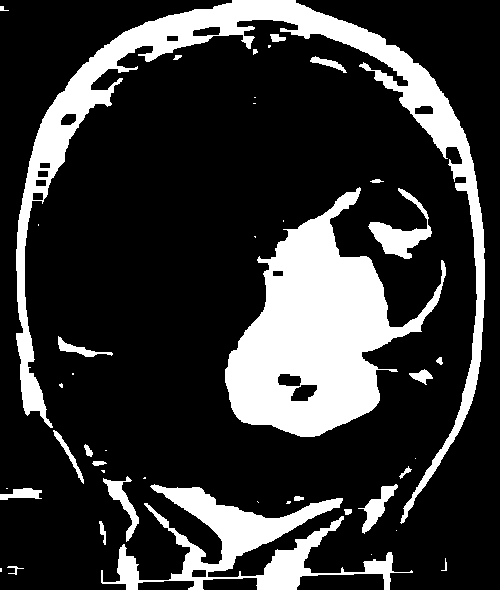

In [0]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY, 0.7)
cv2_imshow(gray)
(T, thresh) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY)
cv2_imshow(thresh)
(T, threshInv) = cv2.threshold(gray, 155, 255, cv2.THRESH_BINARY_INV)
cv2_imshow(threshInv)
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (10, 5))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
cv2_imshow(closed)

In [0]:
closed = cv2.erode(closed, None, iterations = 14)
closed = cv2.dilate(closed, None, iterations = 13)

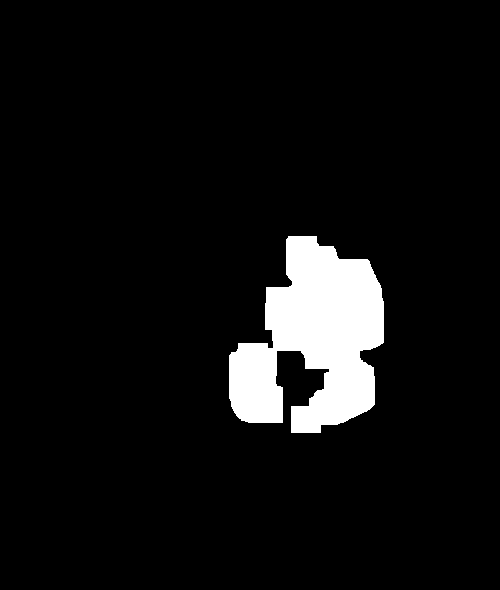

In [0]:
cv2_imshow(closed)

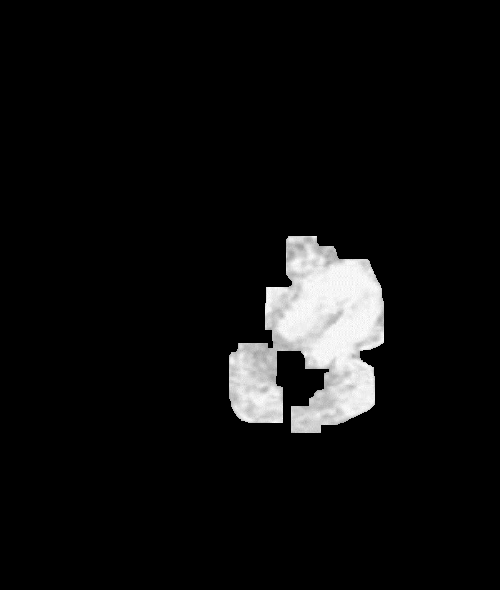

In [0]:
ret,mask = cv2.threshold(closed, 155, 255, cv2.THRESH_BINARY) 
#apply AND operation on image and mask generated by thrresholding
final = cv2.bitwise_and(image,image,mask = mask) 
#plot the result
cv2_imshow(final)

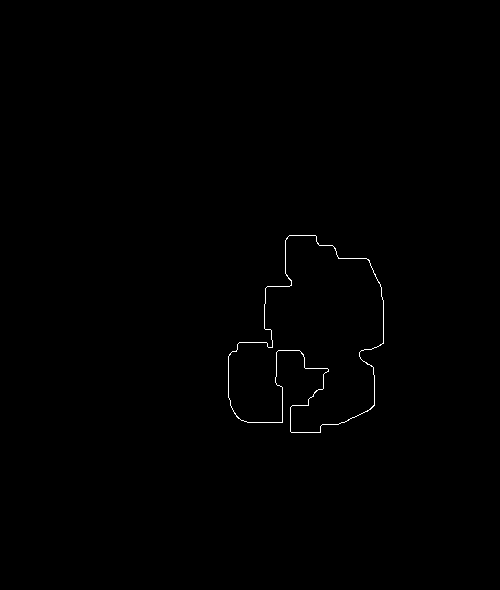

In [0]:
def auto_canny(image, sigma=0.33):
  # compute the median of the single channel pixel intensities
  v = np.median(image)
  # apply automatic Canny edge detection using the computed median
  lower = int(max(0, (1.0 - sigma) * v))
  upper = int(min(255, (1.0 + sigma) * v))
  edged = cv2.Canny(image, lower, upper)
  # return the edged image
  return edged
canny = auto_canny(closed)
cv2_imshow(canny)

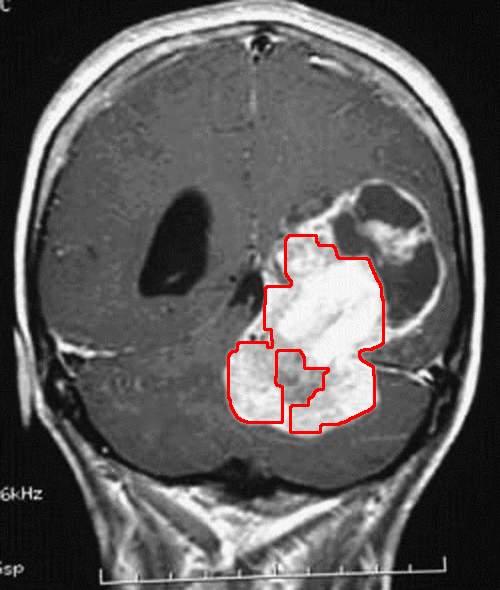

In [0]:
(cnts, _) = cv2.findContours(canny.copy(), cv2.RETR_EXTERNAL,
cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(image, cnts, -1, (0, 0, 255), 2)
cv2_imshow(image) 